Author: Pierce Rotman\
Course: CAP 6673\
Professor: Pashaie\
Date: 30 November 2023\
\
Project 7 - Kalman Filters

1. Since there is only one measurement and the system is static, $A = 1$ and $u(n) = 0$.\
B. Since the system is static and there is only one measurement that is directly measured, $C = 1$.\
C. We apply the Kalman filter to this static problem, initializing $x^{0|0} = 0$, $P^{0|0} = 1000$, $Q=q=0.0001$ and $R=r=0.1$. We also read $y(1) = 0.9$. 

In [1]:
#Initialize variables
x_0_0 = 0
p_0_0 = 1000
r = 0.1
q = 0.0001
y_1 = 0.9

#First find x^1|0 and p^1|0
x_1_0 = x_0_0
p_1_0 = p_0_0 + q
print(f"x_1_0 = {x_1_0}, p_1_0 = {p_1_0}")

#Use Kalman filter
k_1 = p_1_0 * (p_1_0 + r)**-1
x_1_1 = x_1_0 + k_1*(y_1 - x_1_0)
p_1_1 = (1 - k_1)*p_1_0
print(f"k_1 = {k_1}, x_1_1 = {x_1_1}, p_1_1 = {p_1_1}")


x_1_0 = 0, p_1_0 = 1000.0001
k_1 = 0.999900010008998, x_1_1 = 0.8999100090080981, p_1_1 = 0.09999000100102431


Above, we see that our estimated value for the water level using this measurment is roughly 0.8999, with an error covariance $p^{1|1} = 0.0001$.\
D. Now we do the same estimate with maximum likelihood. $C$ is still equal to 1. 

In [2]:
x_ml = (r**-1)**-1*r**-1*y_1
p_x_ml = (r**-1)**-1

print(f"x_ml = {x_ml}, p_x_ml = {p_x_ml}")

x_ml = 0.9, p_x_ml = 0.1


$x_{ml} = 0.9$ and $p_{x_{ml}} = 0.1$. These values are very close to the values obtained in the Kalman filter above. Let's increase to $P^{0|0} = 10000$.

In [3]:
#Initialize variables
x_0_0 = 0
p_0_0 = 10000
r = 0.1
q = 0.0001
y_1 = 0.9

#First find x^1|0 and p^1|0
x_1_0 = x_0_0
p_1_0 = p_0_0 + q
print(f"x_1_0 = {x_1_0}, p_1_0 = {p_1_0}")

#Use Kalman filter
k_1 = p_1_0 / (p_1_0 + r)
x_1_1 = x_1_0 + k_1*(y_1 - x_1_0)
p_1_1 = (1 - k_1)*p_1_0
print(f"k_1 = {k_1}, x_1_1 = {x_1_1}, p_1_1 = {p_1_1}")

x_1_0 = 0, p_1_0 = 10000.0001
k_1 = 0.999990000100099, x_1_1 = 0.8999910000900891, p_1_1 = 0.09999900001024342


Now the estimations with Kalman and maximum likelihood are very close to each other. Increasing $P^{0|0}$ definitely improved our result, though the original was not far off.\
E. Now we do the Kalman filter with ten successive measurements:

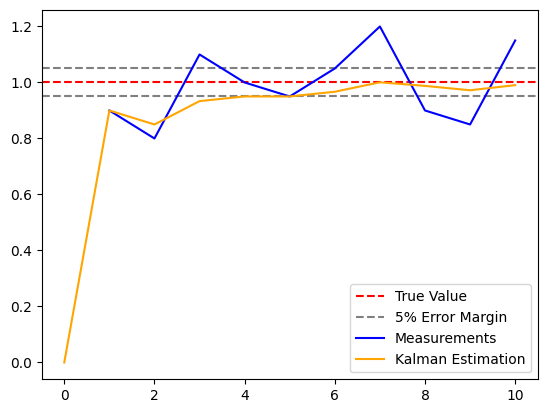

In [4]:
#Initialize variables
x_0_0 = 0
p_0_0 = 10000
r = 0.1
q = 0.0001
ys = [0.9, 0.8, 1.1, 1.0, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]

ks = []
xs = [0]
ps = [10000]

#Iterate through Kalman filter
for i in range(10):
    x_trans = xs[i]
    p_trans = ps[i] + q
    y = ys[i]
    k = p_trans / (p_trans + r)
    x = x_trans + k * (y - x_trans)
    p = (1 - k) * p_trans

    ks.append(k)
    xs.append(x)
    ps.append(p)

import matplotlib.pyplot as plt

#Plot data
measurement_range = range(1,11)
plt.axhline(y = 1.0, color = "red", linestyle = "--", label = "True Value")
plt.axhline(y = 1.05, color = "grey", linestyle = "--", label = "5% Error Margin")
plt.axhline(y = 0.95, color = "grey", linestyle = "--")
plt.plot(measurement_range, ys, color = "blue", label = "Measurements")
plt.plot(xs, color = "orange", label = "Kalman Estimation")
plt.legend(loc = "lower right")
plt.show()

It takes only 5 seconds for the estimations to be within the 5% error level, while the measurements fluctuate wildly outside of the actual value. Our Kalman filter provides us with a very good estimate for the true water level.\
\
2. We now assume that the water level goes up by 0.1 unit every second, but that the system remains static.\
A. We use the updated measurements and actual values to estimate the water level using a Kalman filter. Note that $A$ and $C$ remain equal to 1, becuase the system is static and there is only one measurement. 

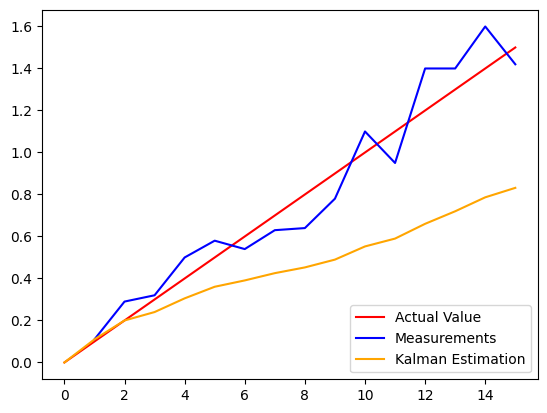

In [5]:
#Initialize variables
x_0_0 = 0
p_0_0 = 10000
r = 0.1
q = 0.0001

#Measurements and actual values
ys = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]
actuals = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

ks = []
xs = [0]
ps = [10000]

#Iterate through Kalman filter
for i in range(15):
    x_trans = xs[i]
    p_trans = ps[i] + q
    y = ys[i]
    k = p_trans / (p_trans + r)
    x = x_trans + k * (y - x_trans)
    p = (1 - k) * p_trans

    ks.append(k)
    xs.append(x)
    ps.append(p)

import matplotlib.pyplot as plt

#Plot data
measurement_range = range(1,16)
plt.plot(actuals, color = "red", label = "Actual Value")
plt.plot(measurement_range, ys, color = "blue", label = "Measurements")
plt.plot(xs, color = "orange", label = "Kalman Estimation")
plt.legend(loc = "lower right")
plt.show()

Clearly, this Kalman filter is not giving us a good estimation, being very biased to underestimate the measurement. This makes sense, because we have assumed that the system is still static while there is in fact an input. Even without changing the dynamics, we can improve the model by adjusting $q$ to reflect increased uncertainty in our dynamics.\
\
B. Change the model such that $q$ is equal to 0.01, 0.1, and then 1.0. 

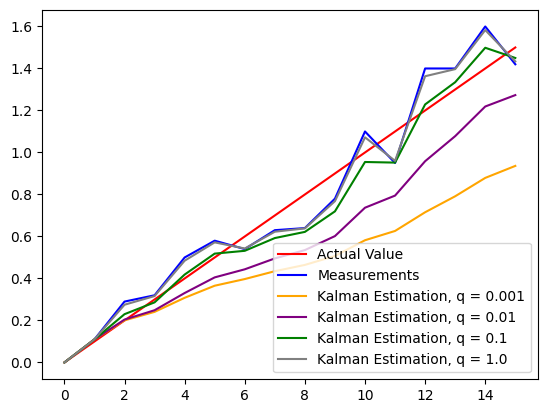

In [18]:
qs = [0.001, 0.01,0.1,1.0]
#Initialize variables
r = 0.1

#Measurements and actual values
ys = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

actuals = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
plt.plot(actuals, color = "red", label = "Actual Value")
plt.plot(measurement_range, ys, color = "blue", label = "Measurements")
colors = ["orange", "purple", "green", "grey"]
for j in range(4):
    x_0_0 = 0
    p_0_0 = 10000
    ks = []
    xs = [0]
    ps = [10000]
    q = qs[j]
    
    #Iterate through Kalman filter
    for i in range(15):
        x_trans = xs[i]
        p_trans = ps[i] + q
        y = ys[i]
        k = p_trans / (p_trans + r)
        x = x_trans + k * (y - x_trans)
        p = (1 - k) * p_trans
    
        ks.append(k)
        xs.append(x)
        ps.append(p)
    
    import matplotlib.pyplot as plt
    
    #Plot data
    plt.plot(xs, color = colors[j], label = f"Kalman Estimation, q = {q}")
plt.legend(loc = "lower right")
plt.show()

Clearly the higher values of $q$ are giving us better results for our estimation. Clearly, if we do not have confidence in our dynamics, a higher $q$ value will help us attain more accurate results. The best $q$ is 0.1, and once we go to $q = 1$, our estimation begins to nearly exactly fit our measurements, but it does not fit the actual values well. This is because $q = 1$ represents too little confidence in the dynamics, and relies too much on measurement. Despite our improved accuracy, it would probably be better to have a more accurate model that accounts for the input.\
\
3. We set up the problem now accounting for the input of 0.1 units per second. We leave $u(n) = 0$ but adjust our $A$ matrix accordingly. We still have direct measurement of only height, so our measurement matrix is $C = [0, 1]^{T}$, because the rate of change is not measured by the sensor. 

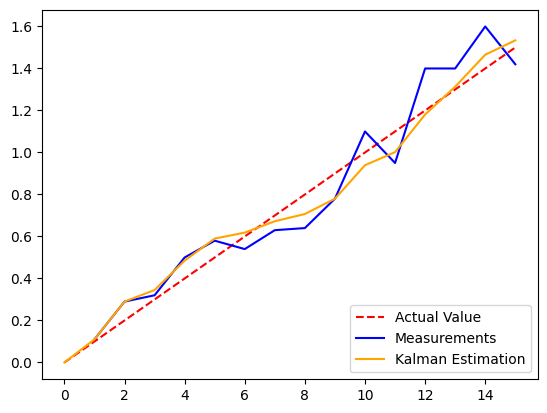

In [11]:
import numpy as np

A = np.matrix([[1, 1], [0, 1]])
C = np.matrix([1, 0])
x_0_0 = np.matrix([0,0]).transpose()
p_0_0 = np.matrix([[1000, 0], [0, 1000]])
Q = np.matrix([[0.0001 / 3, 0.0001 / 2], [0.0001 / 2, 0.0001]])
r = 0.1

#Measurements and actual values
ys = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

actuals = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
xs = [x_0_0]
ps = [p_0_0]
ks = []


for i in range(15):
    x_trans = A.dot(xs[i])
    p_trans = A.dot(ps[i]).dot(A.transpose()) + Q
    k = p_trans.dot(C.transpose()).dot(np.linalg.inv(C.dot(p_trans).dot(C.transpose()) + r))
    ks.append(k)
    x = x_trans + k.dot(ys[i] - C.dot(x_trans))
    p = (np.eye(2) - k.dot(C)).dot(p_trans)
    xs.append(x)
    ps.append(p)

est = []
for i in range(16):
    est.append(xs[i][0,0])


plt.plot(actuals, color = "red", label = "Actual Value", linestyle = '--')
plt.plot(measurement_range, ys, color = "blue", label = "Measurements")
plt.plot(est, color = "orange", label = "Kalman Estimation")
plt.legend(loc = "lower right")
plt.show()

These results are much better than the static model we previously used. Clearly (and intuitively), accounting for the change in height produces a better model.

B. Now we assume someone has closed the input when the level is 1.0, but that the dynamics do not account for this.

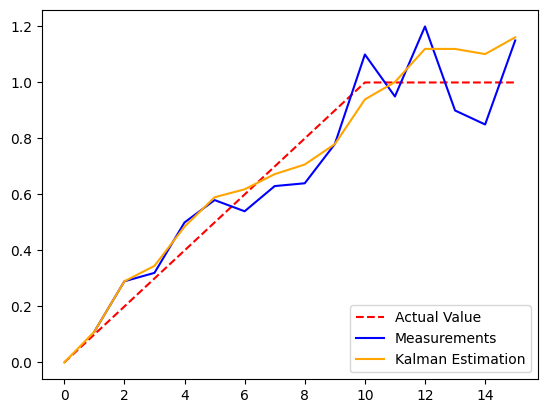

In [8]:
A = np.matrix([[1, 1], [0, 1]])
C = np.matrix([1, 0])
x_0_0 = np.matrix([0,0]).transpose()
p_0_0 = np.matrix([[1000, 0], [0, 1000]])
Q = np.matrix([[0.0001 / 3, 0.0001 / 2], [0.0001 / 2, 0.0001]])
r = 0.1

#Measurements and actual values
ys = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.2, 0.9, 0.85, 1.15]

actuals = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
xs = [x_0_0]
ps = [p_0_0]
ks = []


for i in range(15):
    x_trans = A.dot(xs[i])
    p_trans = A.dot(ps[i]).dot(A.transpose()) + Q
    k = p_trans.dot(C.transpose()).dot(np.linalg.inv(C.dot(p_trans).dot(C.transpose()) + r))
    ks.append(k)
    x = x_trans + k.dot(ys[i] - C.dot(x_trans))
    p = (np.eye(2) - k.dot(C)).dot(p_trans)
    xs.append(x)
    ps.append(p)

est = []
for i in range(16):
    est.append(xs[i][0,0])


plt.plot(actuals, color = "red", label = "Actual Value", linestyle = '--')
plt.plot(measurement_range, ys, color = "blue", label = "Measurements")
plt.plot(est, color = "orange", label = "Kalman Estimation")
plt.legend(loc = "lower right")
plt.show()

Our model does a decent job of accounting for this change in input, but it is not great. In order to fix this error, we would need to either use an input function $u$ or account for the rate of change by setting $C = [1, 1]$. If we insist on keeping the same vector arrangement and not adjusting for the change in input, we can improve the estimate by increasing the values of the $Q$ matrix.

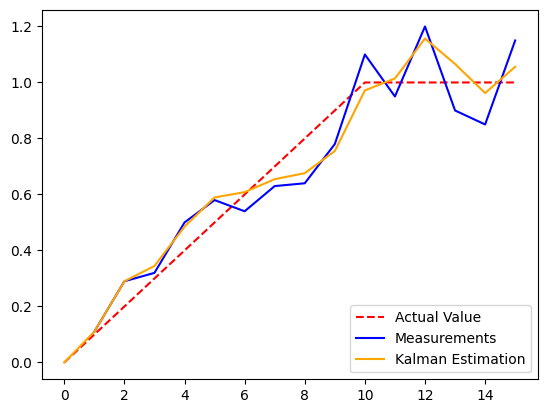

In [9]:
A = np.matrix([[1, 1], [0, 1]])
C = np.matrix([1, 0])
x_0_0 = np.matrix([0,0]).transpose()
p_0_0 = np.matrix([[1000, 0], [0, 1000]])
Q = np.matrix([[0.0001 / 3, 0.0001 / 2], [0.0001 / 2, 0.0001]]) * 100
r = 0.1

#Measurements and actual values
ys = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.2, 0.9, 0.85, 1.15]

actuals = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
xs = [x_0_0]
ps = [p_0_0]
ks = []


for i in range(15):
    x_trans = A.dot(xs[i])
    p_trans = A.dot(ps[i]).dot(A.transpose()) + Q
    k = p_trans.dot(C.transpose()).dot(np.linalg.inv(C.dot(p_trans).dot(C.transpose()) + r))
    ks.append(k)
    x = x_trans + k.dot(ys[i] - C.dot(x_trans))
    p = (np.eye(2) - k.dot(C)).dot(p_trans)
    xs.append(x)
    ps.append(p)

est = []
for i in range(16):
    est.append(xs[i][0,0])


plt.plot(actuals, color = "red", label = "Actual Value", linestyle = '--')
plt.plot(measurement_range, ys, color = "blue", label = "Measurements")
plt.plot(est, color = "orange", label = "Kalman Estimation")
plt.legend(loc = "lower right")
plt.show()

As expected, this improves our estimate where the input stops, but the overall estimation is less accurate than with the original $Q$. However, it is probably better to make this change because it adjusts for our leveling off at height 1.0. Again, it would be better to adjust the vector arrangement to account for the change.